In [2]:
#import packages

import re
import pandas as pd
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [3]:
#Read data 
textData = pd.read_csv("AllTextData.csv")
textData = textData[textData["Sentiment"] != "remove"]

textData

,Unnamed: 0,Type,Sentiment,Content
0,0,News,pos,The vision I want people to understand that ve...
1,1,News,neg,All is quiet at a m on a Thursday in Shibuya T...
2,2,News,neg,ADVERTISEMENT Healthy eating and nutrition are...
3,3,News,neg,LEAN RED MEAT A gut healthy heart smart choice...
4,4,News,neg,Why Vegans Don t Eat Honey Honey is a sweet vi...
...,...,...,...,...
208,208,blog,pos,My story did not start at veganism At age I le...
209,209,blog,neg,Actor Samuel L Jackson previously admitted tha...
210,210,blog,neg,Am I Vegan This is a very common question that...
211,211,news,neg,Opinion Veganism isn t necessarily the most et...


In [6]:
textData["Sentiment"].value_counts()

Sentiment
pos    117
neg     36
Name: count, dtype: int64

In [48]:
#Transform Data
#Build Lemmer
LEMMER = WordNetLemmatizer() 
def MY_LEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [LEMMER.lemmatize(word) for word in words]
    return words

#CountVectorizer transformation using stemming
MyVect_LEM=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_LEMMER,
                        lowercase = True,
                        max_features = 400,
                        min_df = 3,
                        )

Vect_Lem = MyVect_LEM.fit_transform(textData['Content'])
ColumnNames_s=MyVect_LEM.get_feature_names_out()
CorpusDF_Lem=pd.DataFrame(Vect_Lem.toarray(),columns=ColumnNames_s)
#print(CorpusDF_Lem)
CorpusDF_Lem

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


,according,acid,action,add,agriculture,almond,alternative,american,amino,animal,...,way,week,weight,welfare,woman,work,world,wp,year,youtube
0,3,0,0,0,2,1,1,5,0,10,...,3,0,0,2,0,0,4,0,8,0
1,3,0,0,0,2,0,1,2,0,15,...,5,0,0,2,0,3,2,0,13,0
2,0,0,2,0,0,0,0,0,0,6,...,3,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,2,0,0,0
4,0,0,0,0,0,0,7,1,0,10,...,2,0,0,1,0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,0
150,0,0,11,2,4,0,6,9,0,151,...,31,0,3,0,0,8,17,0,37,0
151,0,0,0,0,0,0,4,0,0,12,...,0,2,0,0,0,1,0,0,2,0


In [49]:
X = CorpusDF_Lem
y = textData["Sentiment"].reset_index()
y = y["Sentiment"]
y

0      pos
1      neg
2      neg
3      neg
4      neg
      ... 
148    pos
149    neg
150    neg
151    neg
152    neg
Name: Sentiment, Length: 153, dtype: object

In [52]:
#Build Training Data and Test Datasets

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [54]:
X_train.to_csv("Train Data.csv", index = False)

X_train

,according,acid,action,add,agriculture,almond,alternative,american,amino,animal,...,way,week,weight,welfare,woman,work,world,wp,year,youtube
27,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
75,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,3,2,3,0,1,0
114,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,0,3,0
32,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,2,3,0,0,3,0,0,0,0,7,...,6,0,0,1,0,0,1,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,5,0,0,0,0,0
150,0,0,11,2,4,0,6,9,0,151,...,31,0,3,0,0,8,17,0,37,0
139,0,1,0,0,0,4,1,0,0,2,...,0,0,2,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,1,0,4,...,3,2,0,1,0,0,1,0,4,0


In [56]:
X_test.to_csv("Test Data.csv", index = False)
X_test

,according,acid,action,add,agriculture,almond,alternative,american,amino,animal,...,way,week,weight,welfare,woman,work,world,wp,year,youtube
80,1,0,0,0,0,0,6,0,0,7,...,2,1,0,0,0,0,1,0,1,0
117,0,0,1,0,0,0,0,0,0,3,...,2,5,0,0,0,1,2,0,0,0
17,0,1,0,1,1,1,2,1,0,9,...,1,0,0,0,0,0,2,0,0,0
133,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2,0,1,0
31,3,0,1,0,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,1,0
88,1,0,1,0,1,0,0,0,0,2,...,2,0,0,0,0,0,2,0,1,0
70,0,0,1,0,1,0,1,0,0,2,...,3,1,0,0,0,3,0,0,4,0
149,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,2,0,0,0
30,0,0,0,1,0,0,0,0,0,7,...,3,0,2,0,0,0,0,0,3,0


In [58]:
y_train.to_csv("Train Labels.csv", index = False)
y_train

27     neg
75     neg
114    pos
32     pos
152    neg
      ... 
57     neg
150    neg
139    neg
33     pos
15     pos
Name: Sentiment, Length: 107, dtype: object

In [60]:
y_test.to_csv("Test Labels.csv", index = False)
y_test

80     pos
117    pos
17     pos
133    neg
31     pos
88     pos
70     pos
149    neg
3      neg
30     neg
74     neg
87     pos
110    pos
46     pos
78     pos
10     pos
108    neg
86     neg
96     pos
77     neg
38     pos
25     pos
43     pos
58     pos
61     neg
13     pos
53     neg
6      pos
123    pos
99     pos
64     pos
7      pos
135    pos
72     pos
124    neg
69     pos
22     pos
40     pos
92     pos
12     pos
84     pos
83     pos
115    pos
101    pos
49     pos
34     pos
Name: Sentiment, dtype: object

In [62]:
#Multinomial Naïve Bayes Classification
#Data: Requires frequency counts bag of words
# Initialize and fit the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict on test data
y_pred = mnb.predict(X_test)

In [64]:
# Model accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Multinomial Naive Bayes accuracy:", accuracy)

Multinomial Naive Bayes accuracy: 0.8043478260869565


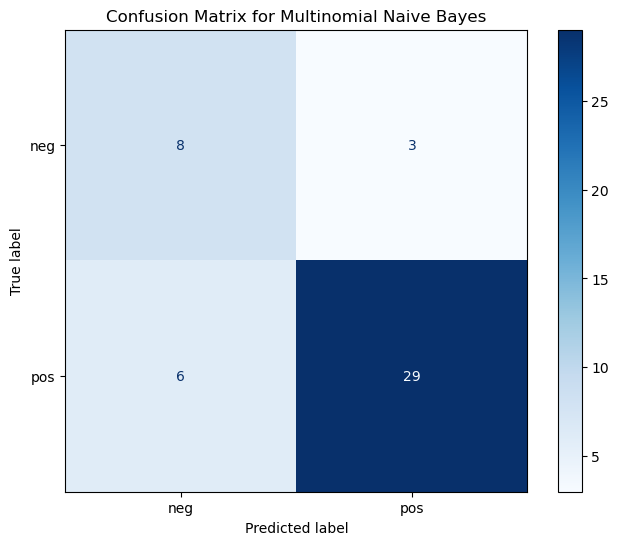

In [66]:
#Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["neg","pos"]
#Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))  # You can adjust the size if needed
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.show()

In [68]:
# Predict probabilities for the test data
probabilities = mnb.predict_proba(X_test)

# Print the probabilities
print(probabilities)

[[2.21334252e-54 1.00000000e+00]
 [6.17977548e-20 1.00000000e+00]
 [2.20340501e-76 1.00000000e+00]
 [7.54379525e-06 9.99992456e-01]
 [2.35340024e-09 9.99999998e-01]
 [3.59561905e-20 1.00000000e+00]
 [3.21381819e-31 1.00000000e+00]
 [3.24845658e-08 9.99999968e-01]
 [1.00000000e+00 4.68447554e-14]
 [9.79513879e-01 2.04861212e-02]
 [9.99999995e-01 5.17660573e-09]
 [1.33646204e-17 1.00000000e+00]
 [1.85373100e-34 1.00000000e+00]
 [1.47105090e-04 9.99852895e-01]
 [3.58483196e-53 1.00000000e+00]
 [4.59683144e-05 9.99954032e-01]
 [9.99999969e-01 3.14143055e-08]
 [1.00000000e+00 2.74850857e-12]
 [9.71406891e-12 1.00000000e+00]
 [9.99999789e-01 2.11406719e-07]
 [1.58173207e-22 1.00000000e+00]
 [4.80558951e-03 9.95194410e-01]
 [1.21003826e-10 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [8.33862381e-18 1.00000000e+00]
 [2.02009113e-03 9.97979909e-01]
 [9.95131794e-01 4.86820587e-03]
 [9.99937889e-01 6.21108260e-05]
 [2.50478226e-03 9.97495218e-01]
 [1.00000000e+00 1.64805325e-18]
 [1.326304